In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Load the dataset
file_path = '/Users/dhusiakalyani/Documents/BLOGPOST/ds_salaries.csv'
data = pd.read_csv(file_path)

In [2]:
# Step 2: Explore basic statistics
basic_statistics = data.describe()
basic_statistics

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


/Users/dhusiakalyani/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


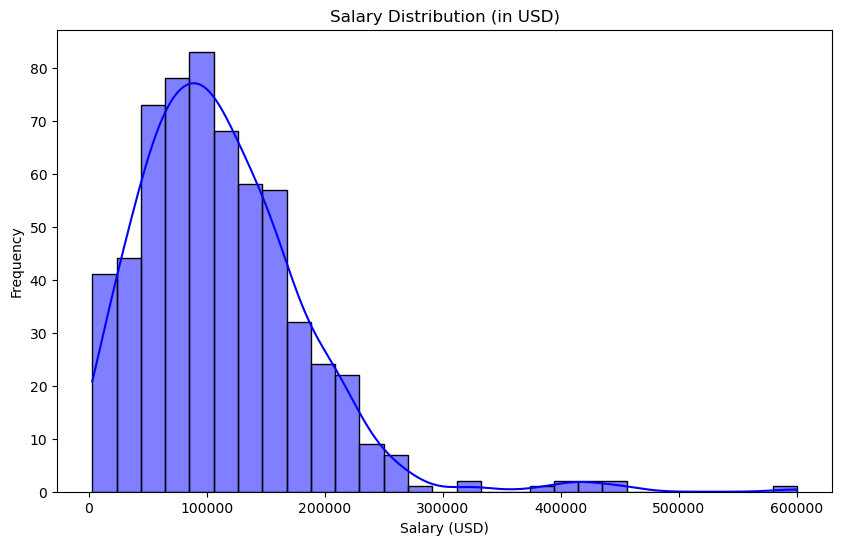

In [3]:
# Step 3: Analyze key trends

# 3.1: Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], kde=True, color='blue')
plt.title('Salary Distribution (in USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

Average Salary by Experience Level:
  experience_level  salary_in_usd
0               EN   61643.318182
1               EX  199392.038462
2               MI   87996.056338
3               SE  138617.292857


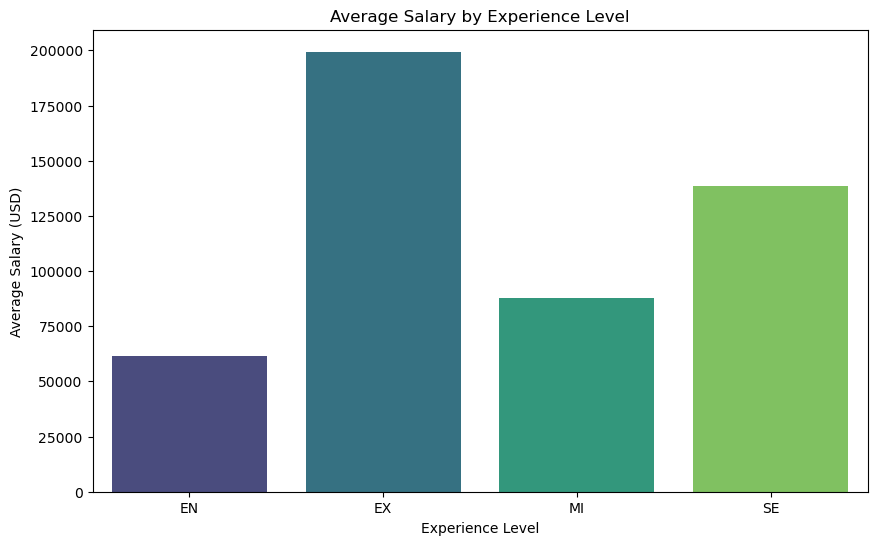

In [4]:
# 3.2: Average Salary by Experience Level
avg_salary_by_exp = data.groupby('experience_level')['salary_in_usd'].mean().reset_index()
print("Average Salary by Experience Level:")
print(avg_salary_by_exp)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_salary_by_exp, x='experience_level', y='salary_in_usd', palette='viridis')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

Average Remote Ratio by Experience Level:
  experience_level  remote_ratio
0               EN     69.886364
1               EX     78.846154
2               MI     63.849765
3               SE     75.892857


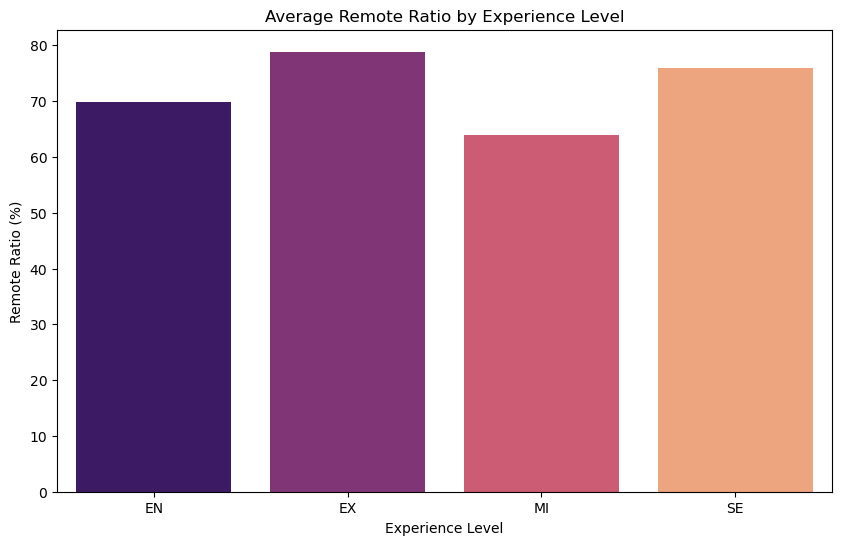

In [5]:
# 3.3: Remote Ratio by Experience Level
avg_remote_by_exp = data.groupby('experience_level')['remote_ratio'].mean().reset_index()
print("Average Remote Ratio by Experience Level:")
print(avg_remote_by_exp)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_remote_by_exp, x='experience_level', y='remote_ratio', palette='magma')
plt.title('Average Remote Ratio by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Remote Ratio (%)')
plt.show()


Average Salary by Company Size:
  company_size  salary_in_usd
0            L  119242.994949
1            M  116905.466258
2            S   77632.674699


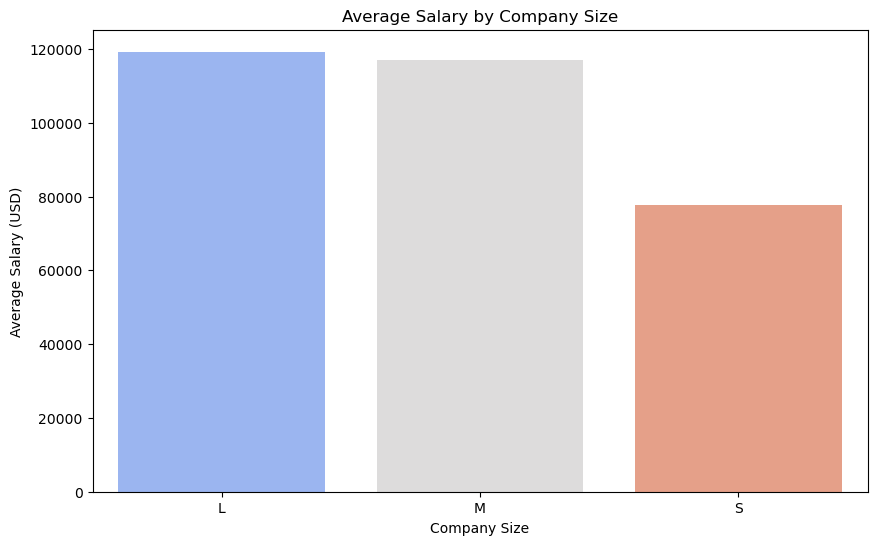

In [6]:
# 3.4: Average Salary by Company Size
avg_salary_by_size = data.groupby('company_size')['salary_in_usd'].mean().reset_index()
print("Average Salary by Company Size:")
print(avg_salary_by_size)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_salary_by_size, x='company_size', y='salary_in_usd', palette='coolwarm')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.savefig("avgsalbycompanysize.png")
plt.show()


In [7]:
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import pycountry

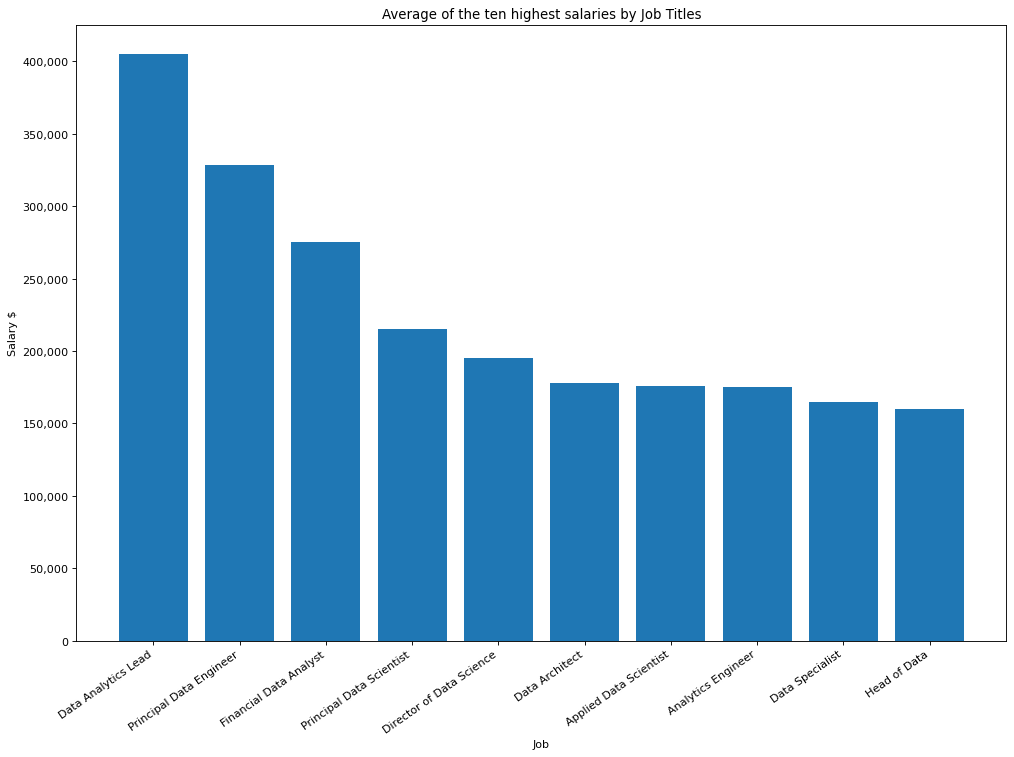

In [8]:
# Create bar chart
average_salary = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
top_ten_salaries = average_salary.head(10)

plt.figure(figsize=(15,10),dpi=80)
plt.bar(top_ten_salaries.index, top_ten_salaries)

# Add labels to the chart
plt.xlabel('Job')
plt.ylabel('Salary $')
plt.title('Average of the ten highest salaries by Job Titles')
plt.xticks(rotation=35, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("highestpaying.png")
plt.show()


In [9]:
import geopandas as gpd
from geopy.geocoders import Photon
from shapely.geometry import Point, Polygon

In [10]:
import pandas as pd
import folium
from geopy.geocoders import Photon
import time

# Step 1: Load the dataset
file_path = 'ds_salaries.csv'
data = pd.read_csv(file_path)

# Step 2: Geocode using Photon
geolocator = Photon(user_agent="geoapiExercises")

coordinates = []

for location in data['company_location'].unique():
    try:
        loc = geolocator.geocode(location, timeout=10)
        time.sleep(1)  # Adding a delay to avoid overwhelming the server
        if loc:
            coordinates.append((location, loc.latitude, loc.longitude))
        else:
            coordinates.append((location, None, None))
    except:
        coordinates.append((location, None, None))

location_df = pd.DataFrame(coordinates, columns=['company_location', 'latitude', 'longitude'])

# Merge back to the original dataset
data = pd.merge(data, location_df, on='company_location')

# Step 3: Plot using Folium
# Create a base map
map_center = [data['latitude'].mean(), data['longitude'].mean()]
job_map = folium.Map(location=map_center, zoom_start=2)

# Add job locations to the map
for _, row in data.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker([row['latitude'], row['longitude']], 
                      popup=row['job_title']).add_to(job_map)

# Save and display the map
job_map.save("job_locations_map.html")
job_map

In [11]:
# Transformation of the codes of the categorical variables

data['experience_level'] = data['experience_level'].replace({'SE': 'Expert', 'MI': 'Intermediate', 'EN': 'Junior', 'EX': 'Director'})

data['employment_type'] = data['employment_type'].replace({'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance', 'PT': 'Part-time'})

def country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return 'other'
    
data['company_location'] = data['company_location'].apply(country_name)
data['employee_residence'] = data['employee_residence'].apply(country_name)

In [12]:
# Categorical variables

for column in ['work_year','experience_level','employment_type','company_size','remote_ratio','job_title','company_location']:
    print(data[column].unique())

[2020 2021 2022]
['Intermediate' 'Expert' 'Junior' 'Director']
['Full-time' 'Contract' 'Part-time' 'Freelance']
['L' 'S' 'M']
[  0  50 100]
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 

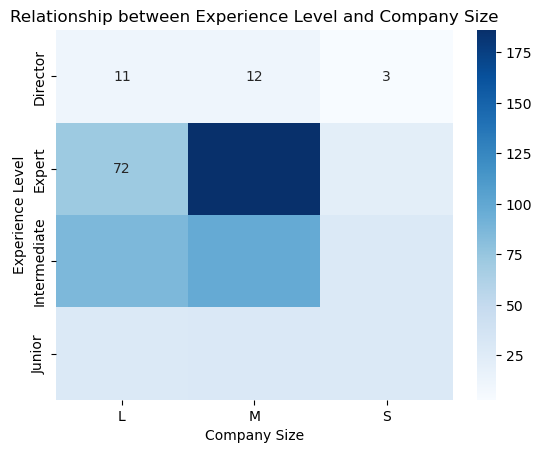

In [13]:
# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(data['experience_level'], data['company_size'])

# Create a heatmap using the cross-tabulation data
#plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Blues')

plt.xlabel('Company Size')
plt.ylabel('Experience Level')
plt.title('Relationship between Experience Level and Company Size')

plt.show()

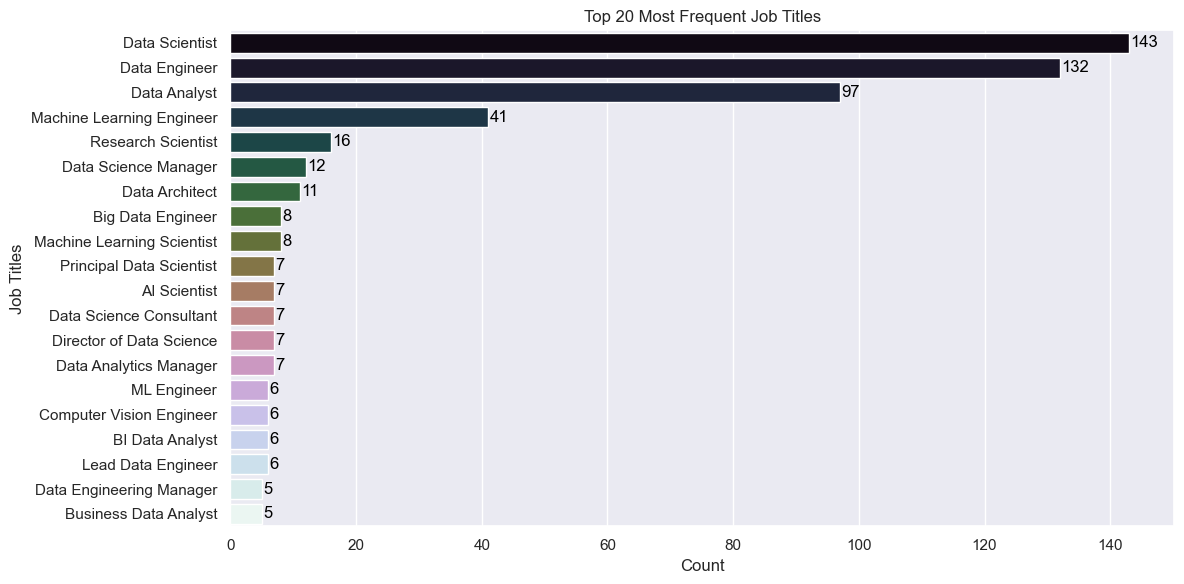

In [14]:
# Extract the "job title" column
job_titles = data['job_title']

# Calculate the frequency of each job title
title_counts = job_titles.value_counts()

# Extract the top 20 most frequent job titles
top_20_titles = title_counts.head(20)

# Create a DataFrame for the top 20 titles
top_20_df = pd.DataFrame({'Job Title': top_20_titles.index, 'Count': top_20_titles.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
ax = sns.barplot(data=top_20_df, x='Count', y='Job Title', palette='cubehelix')
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.title('Top 20 Most Frequent Job Titles')

# Add count labels to the bars
for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.tight_layout()
plt.savefig("20frequent.png")
plt.show()

The analysis focuses on the most prevalent job titles, which collectively encompass over 80% of the total number of employees. These key roles include:

- Data Engineer
- Data Scientist
- Data Analyst
- Machine Learning Engineer
- Analytics Engineer
- Research Scientist
- Data Science Manager
- Applied Scientist

These roles are central to the dataset and provide a comprehensive overview of the workforce composition.

In [15]:
common_jobs = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer','Research Scientist', 'Data Science Manager', 'Applied Scientist']
common_jobs = data[data['job_title'].isin(common_jobs)]

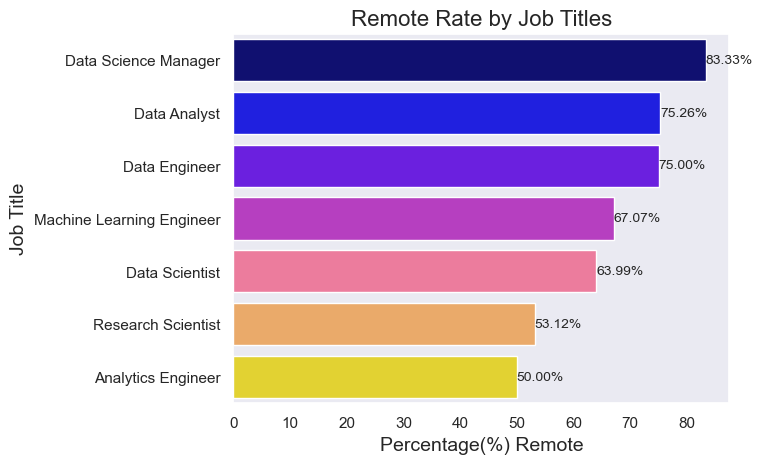

In [16]:
# Group data and calculate mean remote ratio for common jobs
remote_common_jobs = common_jobs.groupby('job_title')['remote_ratio'].mean().sort_values(ascending=False).reset_index()

# Set plot style
sns.set_style("dark")

# Create horizontal bar plot
#plt.figure(figsize=(10,8))
#ax = sns.barplot(x='remote_ratio', y='job_title', data=remote_common_jobs, palette='terrain')
ax = sns.barplot(x='remote_ratio', y='job_title', data=remote_common_jobs, palette='gnuplot2')
# Add values on the bars
for index, value in enumerate(remote_common_jobs['remote_ratio']):
    ax.text(value, index, f'{value:.2f}%', fontsize=10, ha='left', va='center')

# Add labels and title
plt.xlabel('Percentage(%) Remote', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.title('Remote Rate by Job Titles', fontsize=16)
# Show plot
plt.show()

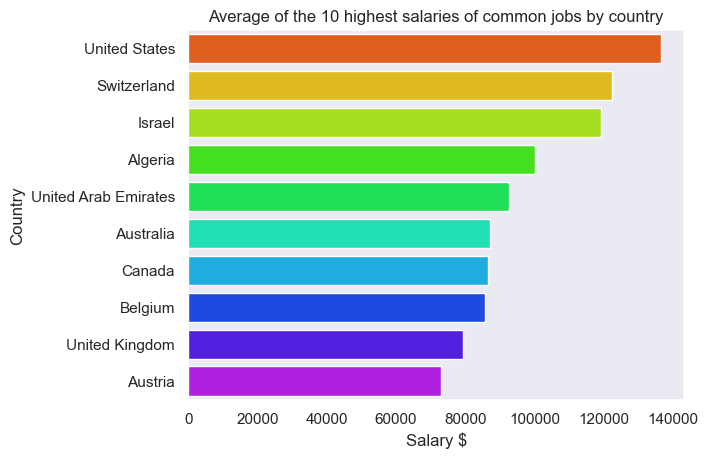

In [17]:
# Calculate average salary by country for common jobs
salary_common_country = common_jobs.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
# Set plot style
sns.set_style("dark")
# Create horizontal bar plot with Seaborn
#plt.figure(figsize=(10, 8))
sns.barplot(x=salary_common_country, y=salary_common_country.index, palette="gist_rainbow")

# Add labels to the chart
plt.xlabel('Salary $')
plt.ylabel('Country')
plt.title('Average of the 10 highest salaries of common jobs by country')

plt.show()

In [18]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()